In [2]:
import scipy.signal as sci
import numpy as np
import TT_prediction as tt
import angle_scan as a_sc
import matplotlib.pyplot as plt

def plot_seismic(data):
    nch, nt = data.shape
    plt.figure(figsize=(8,5))
    plt.imshow(data.T, aspect='auto', cmap='seismic', extent=(0, nch-1,(nt-1)*dt, 0))
    plt.xlabel('Depth (m)')
    plt.ylabel('Time (s)')
    plt.show()

# Generating synthetic data

We will start with a synthetic example in which we generate a simple dataset.

In [3]:
nch = 1000
nt = 1000
dt = 0.001
dz = 1.0

ev_angle = np.array([48.0])
vel = np.linspace(1700.0, 4000.0, nch) # A velocity gradient
ev_delay = tt.pred_vertical_tt(vel, dz, ev_angle) # predict arrival times for all possible angles of incidence 
ev_delay = np.squeeze(ev_delay)
data = np.zeros(shape=(nch, nt))

for i in range(nch):
    fsamp = 200+int(np.round(ev_delay[i]/dt))
    data[i, fsamp-50:fsamp+51] = sci.ricker(101,4.0)

data = data + np.random.normal(0, 1, data.shape)

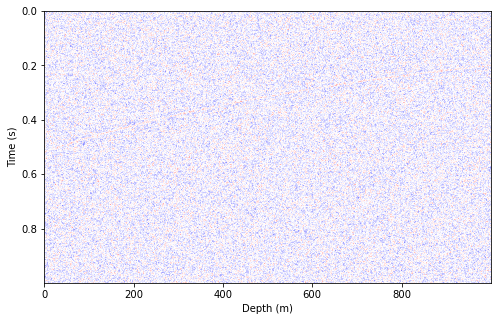

In [4]:
plot_seismic(data)
plt.show()

# Can we automatically recover the angle of arrival for this very noisy event?

In [5]:
pos_angles = np.linspace(0.0,90.0,361) # This method only works for events coming from below the array, so the highest possible angle is 90 degrees - horizontal incidence
pos_delays = tt.pred_vertical_tt(vel, dz, pos_angles)
semb_win = 0.01
(ang_inds, coherence) = a_sc.scan_angles(data, pos_delays, semb_win, dt, 'sembstack')

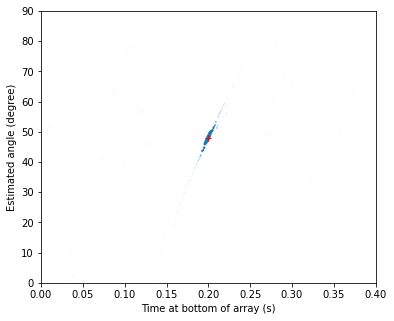

In [7]:
plt.figure(figsize=(6,5))
plt.scatter(np.arange(0,nt)*dt,pos_angles[ang_inds],10000*coherence*coherence)
plt.plot(200*dt,48.0,'+r')
plt.axis([0,0.4,0,90])
plt.xlabel('Time at bottom of array (s)')
plt.ylabel('Estimated angle (degree)')
plt.show()